# 4장 넘파이 3편

## 주요 내용

- 유니버설 함수: 항목별 함수 적용
- 어레이 중심 프로그래밍: 확률과 통계, 정렬

## 기본 설정

`numpy` 모듈과 시각화 도구 모듈인 `matplotlib.pyplot`에 대한 기본 설정을 지정한다.

In [1]:
# 넘파이
import numpy as np
# 램덤 시드
np.random.seed(12345)
# 어레이 사용되는 부동소수점들의 정확도 지정
np.set_printoptions(precision=4, suppress=True)

# 파이플롯
import matplotlib.pyplot as plt
# 도표 크기 지정
plt.rc('figure', figsize=(10, 6))

## 4.2 유니버설 함수: 항목별 함수 적용 (p. 158)

유니버설 함수는 어레이의 항목 각각에 대해 적용되는 함수이며, 반환값은 인자로 사용된 어레이와 
동일한 모양의 어레이로 구현된다.
유니버설 함수를 줄여서 __ufunc__라 부른다.
60개 이상의 유니버설 함수가 존재하며,
그중 상당수가 수학 관련 함수이다. 
모든 함수들의 리스트는 넘파이의 
[유니버설 함수 공식문서](https://numpy.org/doc/stable/reference/ufuncs.html#available-ufuncs)에서
확인할 수 있다.
여기서는 예제를 통해 유니버설 함수의 활용법을 살펴본다.

먼저 (2, 5) 모양의 어레이를 하나 생성하자.

In [2]:
arr = np.arange(10).reshape((2,5))
arr

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

#### `np.sqrt()` 함수

주어진 어레이 각 항목의 제곱근으로 이루어진 어레이가 반환된다.

In [3]:
np.sqrt(arr)

array([[0.    , 1.    , 1.4142, 1.7321, 2.    ],
       [2.2361, 2.4495, 2.6458, 2.8284, 3.    ]])

#### `np.exp()` 함수

주어진 어레이 각 항목을 지수로 사용하는 지수승의 값으로 이루어진 어레이가 반환된다.
단, 밑은 오일러 상수 `e`가 사용된다.

In [4]:
np.exp(arr)

array([[   1.    ,    2.7183,    7.3891,   20.0855,   54.5982],
       [ 148.4132,  403.4288, 1096.6332, 2980.958 , 8103.0839]])

#### `np.maximum()` 함수

여러 개의 어레이를 인자로 받는 함수에 대해서도 동일한 방식으로 작동한다.
예를 들어, `maximum()` 함수는 항목별 최댓값으로 이루어진 어레이를 반환한다.

In [5]:
x = np.random.randn(8).reshape((4, 2))
y = np.random.randn(8).reshape((4, 2))

In [6]:
x

array([[-0.2047,  0.4789],
       [-0.5194, -0.5557],
       [ 1.9658,  1.3934],
       [ 0.0929,  0.2817]])

In [7]:
y

array([[ 0.769 ,  1.2464],
       [ 1.0072, -1.2962],
       [ 0.275 ,  0.2289],
       [ 1.3529,  0.8864]])

In [8]:
np.maximum(x, y)

array([[ 0.769 ,  1.2464],
       [ 1.0072, -0.5557],
       [ 1.9658,  1.3934],
       [ 1.3529,  0.8864]])

#### `np.modf()` 함수

여러 개의 어레이를 반환하는 유니버설 함수도 있다.
예를 들어, `modf()` 함수는 부동소수점 어레이를 인자로 받으면
정수 부분과 소수 부분으로 구성된 동일한 모양(shape)의 두 개의 어레이(로 이루어진 튜플)를 반환한다.
즉, 정수들의 나눗셈 결과를 몫과 나머지로 보여주는 것과 동일한 효과를 낸다.

먼저 (2,4) 모양의 어레이를 하나 만들자.

In [9]:
arr = np.arange(8).reshape((2,4))
arr

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

이제 위 어레이를 3으로 나눈다.

In [10]:
arr_3 = (np.arange(8).reshape((2,4)))/3
arr_3

array([[0.    , 0.3333, 0.6667, 1.    ],
       [1.3333, 1.6667, 2.    , 2.3333]])

`np.modf()` 함수를 적용하면
나머지로 이루어진 어레이와, 몫으로 이루어진 어레이가 반환된다.

In [11]:
np.modf(arr_3)

(array([[0.    , 0.3333, 0.6667, 0.    ],
        [0.3333, 0.6667, 0.    , 0.3333]]),
 array([[0., 0., 0., 1.],
        [1., 1., 2., 2.]]))

길이가 2인 튜플이기에 각 항목에 대해 변수를 지정한 후에 활용하면 된다.

In [12]:
remainder, whole_part = np.modf(arr_3)

In [13]:
remainder

array([[0.    , 0.3333, 0.6667, 0.    ],
       [0.3333, 0.6667, 0.    , 0.3333]])

In [14]:
whole_part

array([[0., 0., 0., 1.],
       [1., 1., 2., 2.]])

위 과정을 하나로 묶어 나눗셈의 몫과 나머지를 반환하는 정의할 수 있다.

In [15]:
def div_mod(X, n):
    return (np.modf(X/n)[1], np.modf(X/n)[0])  # 나머지와 몫의 순서를 바꾼다.

In [16]:
div_mod(arr, 3)

(array([[0., 0., 0., 1.],
        [1., 1., 2., 2.]]),
 array([[0.    , 0.3333, 0.6667, 0.    ],
        [0.3333, 0.6667, 0.    , 0.3333]]))

#### `np.divmod()` 함수

앞서 직접 구현한 `div_mod()` 함수를 일반화시킨 함수가 `np.divmod()` 함수이다.
다만 나머지를 부동소수점이 아닌 정수로 보여주는 점이 다르다.

In [17]:
np.divmod(arr, 3)

(array([[0, 0, 0, 1],
        [1, 1, 2, 2]], dtype=int32),
 array([[0, 1, 2, 0],
        [1, 2, 0, 1]], dtype=int32))

#### `out` 키워드 인자

모든 유니버설 함수는 `out` 키워드 인자를 사용하여 계산 결과를 지정된 변수에 저장할 수 있다.
단, 키워드 인자로 사용될 수 있는 변수는 
동일한 모양과 동일한 자료형(`dtype`)을 사용하는 어레이를 가리키는 변수로 이미 선언되어 있어야 한다.

예를 들어, (4, 2) 모양의 2차원 어레이를 `arr2` 변수가 가리키도록 하자.

In [18]:
arr2 = (np.random.randn(8) * 5).reshape((2, 4))
arr2

array([[-10.0082,  -1.8592,   8.3451,  -2.1928],
       [ -2.6987,   2.3849,  16.2447,  -5.1061]])

이제 `arr2`에 제곱근 함수를 적용한 결과를 `arr_3` 변수가 가기키도록 하려면 아래와 같이 한다.

__주의사항:__ 제곱근 함수는 음수에 대해서는 경고를 생성하며, 해당 항목은 `nan`으로 표시한다. 
nan은 not a number, 즉, 숫자가 아님을 표시한다.

In [19]:
np.sqrt(arr2, out=arr_3)

<ipython-input-19-01ab4b47c2f5>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr2, out=arr_3)


array([[   nan,    nan, 2.8888,    nan],
       [   nan, 1.5443, 4.0305,    nan]])

`arr_3` 변수가 위 결과를 가리키고 있음을 확인할 수 있다.

In [20]:
arr_3

array([[   nan,    nan, 2.8888,    nan],
       [   nan, 1.5443, 4.0305,    nan]])

## 4.3 어레이 중심 프로그래밍 (p. 161)

연산과 함수 호출에 사용되는 넘파이 어레이는 기본적으로 항목 단위로 연산과 함수 호출이 이루어진다.
넘파이 어레이의 이런 특징을 잘 활용하도록 유도하는 프로그래밍을 
__어레이 중심 프로그래밍__(array-oriented programming)이라 한다. 

어레이를 중심으로 프로그래밍을 하면 예를 들어 많은 `for` 반복문을 생략할 수 있으며,
결과적으로 보다 효율적으로 코드를 구현할 수 있다.
또한 구현된 프로그램은 리스트를 이용하는 프로그램보다 빠르고 메모리 효율적으로 실행된다.
여기서는 몇 가지 예제를 이용하여 어레이 중심 프로그래밍을 소개한다. 

__예제:__ 2차원 격자(meshgrid) 어레이

아래 모양의 격자무뉘에 해당하는 2차원 어레이를 생성하고자 한다.
각 점의 좌표는 -1과 1사이의 값을 20개의 구간으로 균등하게 나눈 값들이다. 
즉, 가로 세로 모두 21개의 점으로 구성된다.

__주의사항:__ `for` 반복문을 전혀 사용하지 않아야 한다.

<img src="https://github.com/codingalzi/python-data-analysis/blob/master/notebooks/images/graphs/meshgrid20x20.png?raw=true" style="width:400px;">

먼저 `arange()` 함수를 이용하여 -1와 1 사이의 구간을 20개의 구간으로 균등하게 
나누는 어레이를 생성하려면
아래에서 처럼 -1에서 1.1 이전까지 0.1 스텝으로 증가하는 값들로 이루어진 어레이를 생성하면 된다.

In [21]:
points = np.arange(-1, 1.1, 0.1) # -1부터 1.1 전까지 0.1 스텝으로 증가하는 값들의 어레이 생성

points

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

#### `np.meshgrid()` 함수

`meshgrid()` 함수는 지정된 1차원 어레이 두 개를 이용하여 격자무늬의 좌표를 생성한다.
즉, 격자에 사용되는 점들의 x 좌표와 y 좌표를 따로따로 모아 두 개의 어레이를 반환한다.

In [22]:
xs, ys = np.meshgrid(points, points)

In [23]:
xs

array([[-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],

In [24]:
ys

array([[-1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ,
        -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ],
       [-0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9,
        -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9],
       [-0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8,
        -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8],
       [-0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7,
        -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7],
       [-0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6,
        -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6],
       [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
        -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5],
       [-0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
        -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4],

xs와 ys를 이용하여 산점도를 그리면 원하는 격자무늬가 얻어진다. 

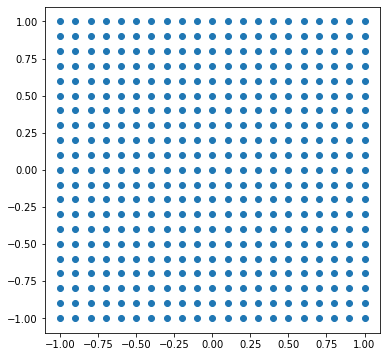

In [25]:
# 도표 크기 지정
plt.rc('figure', figsize=(6, 6))

# 산점도 그리기
plt.scatter(xs, ys)
plt.show()

__예제:__ 2차원 이미지 그리기

xs와 ys 각각의 제곱을 합하여 제곱근을 구하면 21x21 크기의 대칭 어레이가 얻어진다. 

In [26]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [27]:
z.shape

(21, 21)

`z`를 흑백사진으로 표현하면 다음과 같다.
`21x21` 크기의 해상도를 가진 흑백사진의 명암 대비를 쉽게 알아볼 수 있는 사진이 생성된다.

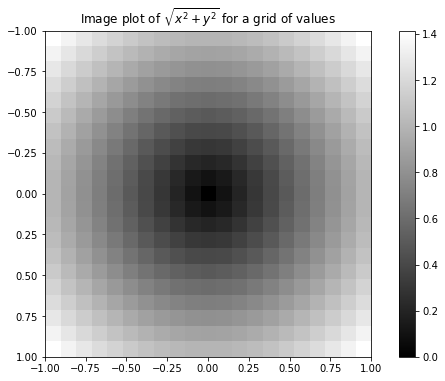

In [28]:
# 도표 크기 지정(기본값으로 되돌림)
plt.rc('figure', figsize=(10, 6))

# 흑백사진으로 보여주도록 함.
plt.imshow(z, cmap=plt.cm.gray, extent=[-1, 1, 1, -1])
# 컬러바(색상 지도)도 보여줄 수 있음.
plt.colorbar()
# 도표 타이틀 지정(한글 지원은 좀 복잡함)
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

plt.show()

__참고:__ 위 두 예제를 넘파이 어레이가 아니라 리스트와 `for` 반복문을 이용하여 구현하려고
시도하면 훨씬 많은 일을 해야 함을 어렵지 않게 알 수 있을 것이다.

### 4.3.2 통계 메서드 (p. 165)

넘파이 어레이에 사용된 항목들의 합(sum), 평균값(mean), 표준편차(std) 등 기본 통계함수를 지원한다.

연습을 위해 먼저 (3, 3) 모양의 어레이를 무작위로 생성한다.

In [29]:
arr = np.arange(1, 7).reshape(2, 3)
arr

array([[1, 2, 3],
       [4, 5, 6]])

#### `mean()` 메서드

어레이에 포함된 모든 값들의 평균값을 계산한다.

In [30]:
arr.mean()

3.5

__참고:__ `np.mean()` 함수를 호출하면 어레이 객체에 포함된 `mean()` 메서드가 사용된다.

In [31]:
np.mean(arr)

3.5

#### `sum()` 메서드

어레이에 포함된 모든 값들의 합을 계산한다.

In [32]:
arr.sum()

21

#### `cumsum()` 메서드

어레이에 포함된 모든 값들의 누적합을 계산한다.

In [33]:
arr.cumsum()

array([ 1,  3,  6, 10, 15, 21], dtype=int32)

#### `cumprod()` 메서드

어레이에 포함된 모든 값들의 누적곱을 계산한다.

In [34]:
arr.cumprod()

array([  1,   2,   6,  24, 120, 720], dtype=int32)

#### 축(axis) 활용

앞서 언급된 모든 함수는 축(axis)을 이용한 함수 적용도 지원한다.
즉, 축을 지정하여 축에 따른 결과를 모든 어레이를 생성한다.
축 지정은 `axis` 키워드 인자를 사용한다.

* `axis=0`: 행을 기준으로 함수 적용
* `axis=1`: 열을 기준으로 함수 적용

##### 평균값

* 열별 평균값 계산: 행을 따라 평균값을 계산해야 하기에 `axis=0` 지정.

In [35]:
arr.mean(axis=0)

array([2.5, 3.5, 4.5])

* 행별 평균값 계산: 열을 따라 평균값을 계산해야 하기에 `axis=1` 지정.

In [36]:
arr.mean(axis=1)

array([2., 5.])

##### 합

* 열별 항목의 합 계산: 행을 따라 항목들의 합을 계산해야 하기에 `axis=0` 지정.

In [37]:
arr.sum(axis=0)

array([5, 7, 9])

* 행별 항목의 합 계산: 열을 따라 항목들의 합을 계산해야 하기에 `axis=1` 지정.

In [38]:
arr.sum(axis=1)

array([ 6, 15])

##### 누적합

* 열별 항목의 누적합 계산: 행을 따라 항목들의 누적합을 계산해야 하기에 `axis=0` 지정.

In [39]:
arr.cumsum(axis=0)

array([[1, 2, 3],
       [5, 7, 9]], dtype=int32)

* 행별 항목의 누적합 계산: 열을 따라 항목들의 누적합을 계산해야 하기에 `axis=1` 지정.

In [40]:
arr.cumsum(axis=1)

array([[ 1,  3,  6],
       [ 4,  9, 15]], dtype=int32)

##### 누적곱

* 열별 항목의 누적곱 계산: 행을 따라 항목들의 누적곱을 계산해야 하기에 `axis=0` 지정.

In [41]:
arr.cumprod(axis=0)

array([[ 1,  2,  3],
       [ 4, 10, 18]], dtype=int32)

* 행별 항목의 누적곱 계산: 열을 따라 항목들의 누적곱을 계산해야 하기에 `axis=1` 지정.

In [42]:
arr.cumprod(axis=1)

array([[  1,   2,   6],
       [  4,  20, 120]], dtype=int32)

### 4.3.3 부울 어레이 메서드 (p. 167)

#### 참인 항목의 개수

특정 조건을 만족하는 항목들의 개수를 구하는 과정은 다음과 같다.

* 부울 연산식을 이용하여 조건 구현
* `sum()` 메서드 활용 가능. 이유는 `True`는 1, `False`는 0으로 간주되기 때문임.

아래 코드는 임의로 생성된 100개의 부동소수점 중에서 양수의 개수를 계산한다.

In [43]:
arr = np.random.randn(100)

In [44]:
(arr > 0).sum()

51

#### `any()`와 `all()` 메서드

* `any()` 메서드: 부울 어레이에 포함된 항목이 하나라도 참이면 참을 반환
* `all()` 메서드: 부울 어레이에 포함된 항목이 모두 참일 때만 참을 반환

In [45]:
bools = np.array([False, False, True, False])

In [46]:
bools.any()

True

In [47]:
bools.all()

False

### 4.3.4 정렬 (p. 168)

#### `sort()` 메서드

정해진 축을 기준으로 오름차순으로 정열할 때 사용한다. 
물론 1차원 어레이는 축을 지정할 필요가 없다.

In [48]:
arr = np.random.randn(6)
arr

array([-0.2746, -0.1391,  0.1077, -0.6065, -0.4171, -0.017 ])

In [49]:
arr.sort()
arr

array([-0.6065, -0.4171, -0.2746, -0.1391, -0.017 ,  0.1077])

다차원 어레이는 축을 이용하여 행 또는 열 기준으로 정렬할 수 있다.

In [50]:
arr = np.random.randn(5, 3)
arr

array([[-1.2241, -1.8008,  1.6347],
       [ 0.989 ,  0.4579,  0.5552],
       [ 1.3067, -0.4406, -0.3014],
       [ 0.4988, -0.824 ,  1.3206],
       [ 0.508 , -0.6534,  0.187 ]])

행을 따라 정렬하려면 인자 0을 사용한다.

In [51]:
arr.sort(0)
arr

array([[-1.2241, -1.8008, -0.3014],
       [ 0.4988, -0.824 ,  0.187 ],
       [ 0.508 , -0.6534,  0.5552],
       [ 0.989 , -0.4406,  1.3206],
       [ 1.3067,  0.4579,  1.6347]])

__주의사항:__ (책의 설명과는 달리) `sort()` 메서드는 기존의 어레이를 직접 변환한다. 
즉, `arr`이 직접 변경된다. 

In [52]:
arr

array([[-1.2241, -1.8008, -0.3014],
       [ 0.4988, -0.824 ,  0.187 ],
       [ 0.508 , -0.6534,  0.5552],
       [ 0.989 , -0.4406,  1.3206],
       [ 1.3067,  0.4579,  1.6347]])

열을 따라 정렬하려면 인자 1을 사용한다.

In [53]:
arr.sort(1)
arr

array([[-1.8008, -1.2241, -0.3014],
       [-0.824 ,  0.187 ,  0.4988],
       [-0.6534,  0.508 ,  0.5552],
       [-0.4406,  0.989 ,  1.3206],
       [ 0.4579,  1.3067,  1.6347]])

#### 예제

어레이에 사용된 값들의 백분위수를 정렬을 이용하여 쉽게 구할 수 있다.

예를 들어, 임의로 생성된 1,000개의 부동 소수점들 중에서 하위 5%에 해당하는 수를 구해보자.

In [54]:
large_arr = np.random.randn(1000)

먼저 정렬 한 다음에 하위 5%에 해당하는 위치를 구하여 인덱싱하면 바로 답이 나온다.

In [55]:
large_arr.sort()

하위 5%의 위치는 어레이의 길이에 0.05를 곱해준 값에 해당한다.
인덱스로 사용해야 하기에 정수로 형변환해주면 되며,
예상한 대로 50번 인덱스의 값을 가리킨다.

In [56]:
five_from_bottom = int(0.05 * len(large_arr))
five_from_bottom

50

따라서 하위 5%에 해당하는 값은 아래와 같다.

In [57]:
large_arr[five_from_bottom]

-1.4995034502869655

#### `argmax()` 메서드

지정된 축을 기준으로 항목들을 가장 큰 값의 항목이 위치한 인덱스를 반환한다.

In [58]:
arr= np.arange(6).reshape(2,3) + 10
arr

array([[10, 11, 12],
       [13, 14, 15]])

축을 지정하지 않으면 전체 항목을 대상으로 하며,
반환된 값은 어레이를 1차원으로 변환했을 때의 순서를 보여준다.

아래 결과인 5는 5번 인덱스, 여기서는 마지막에 사용된 항목을 가리킨다.

In [59]:
arr.argmax()

5

축을 지정하면 축별로 인덱스를 반환한다.

예를 들어, 열별 최대 값이 위치한 인덱스는 당연히 1이 나온다.
이유는 1번 행(둘쨋줄)의 값이 0번 행(첫째줄)의 값들보다 모두 크기 때문이다.

In [60]:
arr.argmax(0)

array([1, 1, 1], dtype=int64)

반면에 행별 최대 값이 위치한 인덱스는 비슷한 이유로 2이다. 

In [61]:
arr.argmax(1)

array([2, 2], dtype=int64)